In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set path variable

path = r'C:\Users\Jenna\Desktop\Data Course\Part4_Instacart_analysis\02_Data'

In [3]:
# set chart path variable

path2 =r'C:\Users\Jenna\Desktop\Data Course\Part4_Instacart_analysis\04_Analysis\Visualizations'

In [4]:
#import the dataframe

df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'final_e10_flags.pkl' ))

In [44]:
pd.options.display.max_columns = None

df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order,spending_flag,order_freq,freq_flag,First Name,Last Name,Gender,STATE,Age,date_joined,Number_of_Dependants,fam_status,income,True,age,n_dependants,Region,Age Group,Income Group,Family Group,Product Group,Hour Group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid range product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3,South,Young Adult,Lower Income,Big Family,Specialized Product,Morning Orders
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly Busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3,South,Young Adult,Lower Income,Big Family,Specialized Product,Morning Orders
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid range product,Regularly Busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3,South,Young Adult,Lower Income,Big Family,Specialized Product,Day Orders
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid range product,Least Busy,Slowest days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3,South,Young Adult,Lower Income,Big Family,Specialized Product,Morning Orders
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid range product,Least Busy,Slowest days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,31,3,South,Young Adult,Lower Income,Big Family,Specialized Product,Day Orders


In [5]:
# bring in the colors for the plots

clr1 = [0.2, 0.8, 0.2, 0.6]
clr2 = [0.4, 0.9, 0.6, 0.6]
clr3 = [0.6, 0.9, 0.9, 0.6]
clr4 = [0.9, 0.9, 0.9, 0.6]b

# Key question 1:

The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.


In [21]:
data = df['orders_day_of_week'].value_counts().sort_index()

In [35]:
# set labels 

labels = [ 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri' ]

Text(0, 0.5, 'Order Frequency')

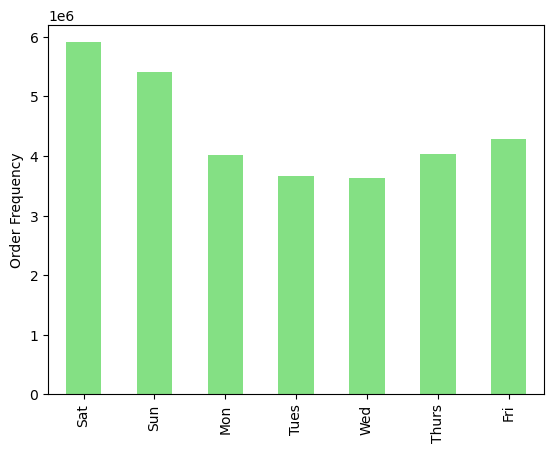

In [29]:
#remake the orders day of week bar chart 

bar_dow = data.plot.bar( color = [clr1])
bar_dow.set_xticklabels(labels)
bar_dow.set_ylabel('Order Frequency')

In [30]:
#export

bar_dow.figure.savefig(os.path.join(path2, 'bar_dow_final.png'))

In [40]:
labels2 = ['0','12pm', '5am', '10am', '3pm', '8pm']

C:\Users\Jenna\AppData\Local\Temp\ipykernel_5840\2005232874.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist_hour.set_xticklabels(labels2)


[Text(-5.0, 0, '0'),
 Text(0.0, 0, '12pm'),
 Text(5.0, 0, '5am'),
 Text(10.0, 0, '10am'),
 Text(15.0, 0, '3pm'),
 Text(20.0, 0, '8pm'),
 Text(25.0, 0, '')]

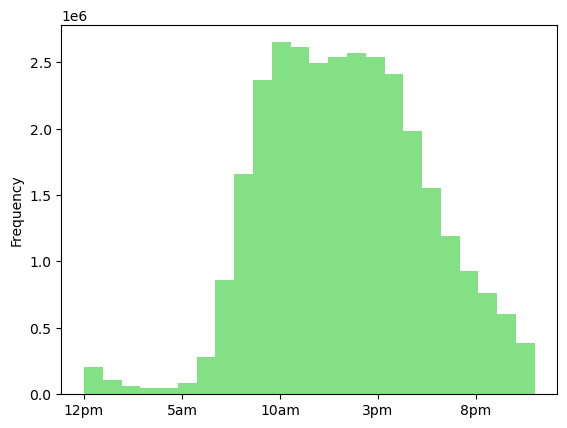

In [41]:
# remake hour of day histogram
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24, color = [clr1])
hist_hour.set_xticklabels(labels2)

In [42]:
#export

hist_hour.figure.savefig(os.path.join(path2, 'hist_hour_final.png'))


# Key question 3:

Instacart has a lot of products with different price tags. Marketing and sales want touse simpler price range groupings to help direct their efforts.


In [48]:
# set up parameters for a graph showing distribution of our price groups

proportions = df['price_range_loc'].value_counts()

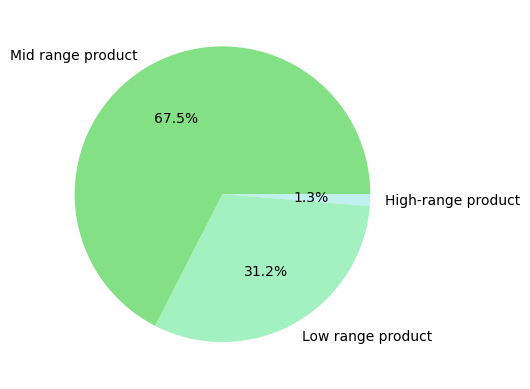

In [50]:
pricegroup_pie = plt.pie(proportions, labels = proportions.index, autopct='%1.1f%%', colors = [clr1, clr2, clr3])

#export

plt.savefig(os.path.join(path2, 'price_group_distribution.png'))

# Key Question 4:

Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of
product orders.


In [73]:
labels_food =item_names = [
    'frozen',
    'other',
    'bakery',
    'produce',
    'alcohol',
    'int.',
    'bevs.',
    'pets',
    'dry/goods/pasta',
    'bulk',
    'personal care',
    'meat seafood',
    'pantry',
    'breakfast',
    'canned goods',
    'dairy eggs',
    'household',
    'babies',
    'snacks',
    'deli',
    'missing'
]


In [74]:
proportions_food = df['department_id'].value_counts().sort_index()

Text(0, 0.5, 'Order Frequency')

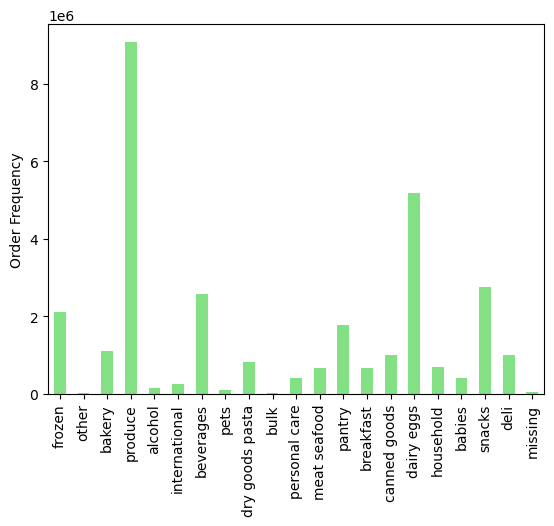

In [75]:
bar_food = proportions_food.plot.bar( color = [clr1])
bar_food.set_xticklabels(labels_food)
bar_food.set_ylabel('Order Frequency')

In [77]:
# export

bar_food.figure.savefig(os.path.join(path2, 'bar_dep_id_final.png'))

# Key Question 5:

What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

[Text(0, 0, 'Regular'), Text(1, 0, 'Loyal'), Text(2, 0, 'New')]

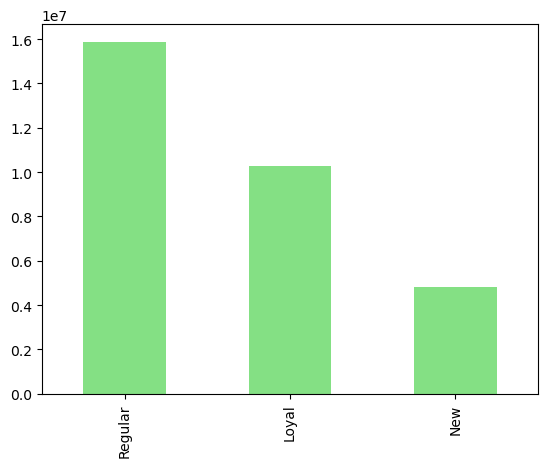

In [86]:
# remake the customer loyalty 
labels_cust = ['Regular', 'Loyal', 'New']
cust_bar = df['loyalty_flag'].value_counts().plot.bar(color= clr1)
cust_bar.set_xticklabels(labels_cust)

In [87]:
#export

cust_bar.figure.savefig(os.path.join(path2, 'customer_bar_final.png'))

# Key Question 6: 

Are there differences in ordering habits based on a customer’s loyalty status?

In [97]:
# make a cross tab of the spending flag and the loyalty flag

loyal_spender = pd.crosstab(df['spending_flag'], df['loyalty_flag'], dropna = False)

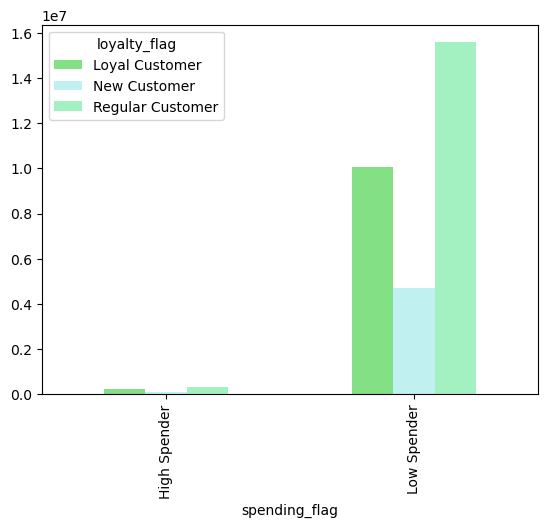

In [98]:
# make this into a bar graph

bar_loyal_spender = loyal_spender.plot.bar(color = [clr1, clr3, clr2, clr4] )

In [113]:
#export

bar_loyal_spender.figure.savefig(os.path.join(path2, 'bar_loyal_spender_final.png'))

In [110]:
# make a cross tab of the frequncy flag and the loyalty flag

loyal_frequent = pd.crosstab(df['freq_flag'], df['loyalty_flag'], dropna = False)

[Text(0, 0, 'Frequent'), Text(1, 0, 'Non-frequeny'), Text(2, 0, 'Regular')]

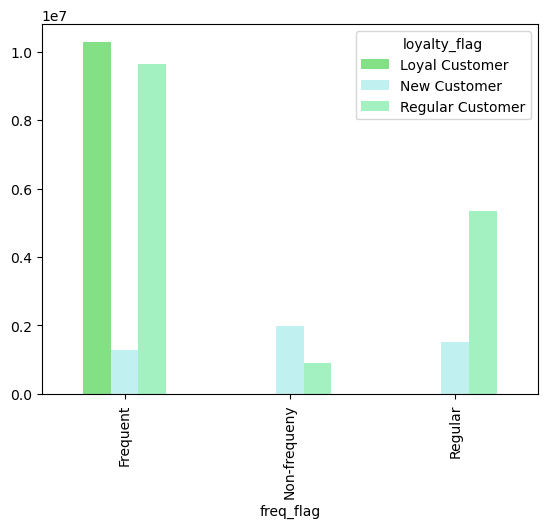

In [112]:
# make a bar graph

labels_freq_loyalty = ['Frequent', 'Non-frequeny', 'Regular']
bar_loyal_frequent = loyal_frequent.plot.bar(color = [clr1, clr3, clr2] )
bar_loyal_frequent.set_xticklabels(labels_freq_loyalty)

In [128]:
#export

bar_loyal_frequent.figure.savefig(os.path.join(path2, 'bar_loyal_frequent_final.png'))

# Key Question 7:

Are there differences in ordering habits based on a customer’s region?

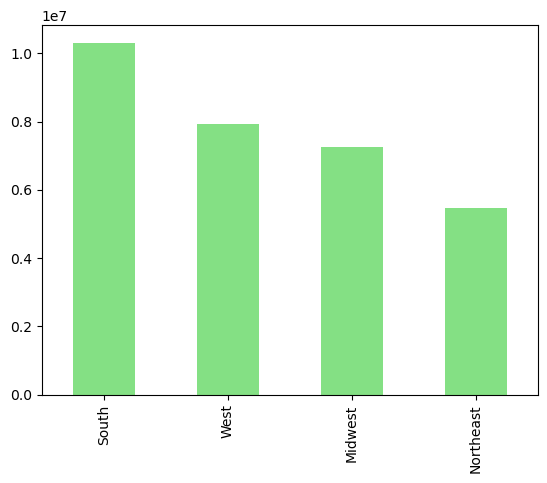

In [116]:
# distribution of orders by region

region_bar = df['Region'].value_counts().plot.bar(color =[clr1])

In [117]:
#export

region_bar.figure.savefig(os.path.join(path2, 'region_bar_distribution.png'))

In [118]:
# make a cross tab of the spending flag and the region

region_spender = pd.crosstab(df['spending_flag'], df['Region'], dropna = False)

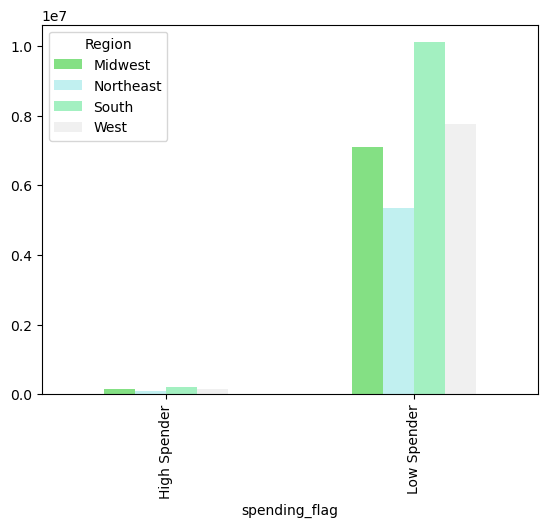

In [119]:
# make this into a bar graph

bar_region_spender = region_spender.plot.bar(color = [clr1, clr3, clr2, clr4] )

In [120]:
#export

bar_region_spender.figure.savefig(os.path.join(path2, 'bar_region_spender_final.png'))

In [123]:
# make a cross tab of the frequncy flag and the region 

region_frequent = pd.crosstab(df['freq_flag'], df['Region'], dropna = False)

[Text(0, 0, 'Frequent'), Text(1, 0, 'Non-frequeny'), Text(2, 0, 'Regular')]

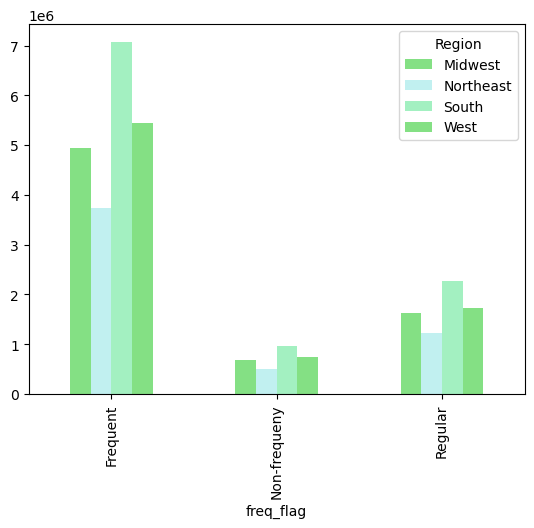

In [125]:
# make a bar graph

labels_freq_region = ['Frequent', 'Non-frequeny', 'Regular']
bar_region_frequent = region_frequent.plot.bar(color = [clr1, clr3, clr2] )
bar_region_frequent.set_xticklabels(labels_freq_region)

In [127]:
#export

bar_loyal_frequent.figure.savefig(os.path.join(path2, 'bar_region_frequent_final.png'))